# CHAPTER 9  
***  
## Reading and Writing Natural Languages  
***  

## Summarizing Data  
***  


In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import string
from collections import Counter

def cleanSentence(sentence):
    sentence = sentence.split(' ')
    sentence = [word.strip(string.punctuation+string.whitespace) for word in sentence]
    sentence = [word for word in sentence if len(word) > 1 or (word.lower() == 'a' or word.lower() == 'i')]
    return sentence

def cleanInput(content):
    content = content.upper()
    content = re.sub('\n', ' ', content)
    content = bytes(content, 'UTF-8')
    content = content.decode('ascii', 'ignore')
    sentences = content.split('. ')
    return [cleanSentence(sentence) for sentence in sentences]

def getNgramsFromSentence(content, n):
    output = []
    for i in range(len(content)-n+1):
        output.append(content[i:i+n])
    return output

def getNgrams(content, n):
    content = cleanInput(content)
    ngrams = Counter()
    ngrams_list = []
    for sentence in content:
        newNgrams = [' '.join(ngram) for ngram in getNgramsFromSentence(sentence, n)]
        ngrams_list.extend(newNgrams)
        ngrams.update(newNgrams)
    return(ngrams)


content = str(
      urlopen('http://pythonscraping.com/files/inaugurationSpeech.txt').read(),
              'utf-8')
ngrams = getNgrams(content, 3)
print(ngrams)

Counter({'OF THE PEOPLE': 13, 'OF THE CONSTITUTION': 11, 'THE UNITED STATES': 10, 'OF THE UNITED': 9, 'IT MAY BE': 8, 'OF THE GOVERNMENT': 8, 'THE CHARACTER OF': 7, 'OF THE EXECUTIVE': 7, 'BY THE CONSTITUTION': 6, 'PART OF THE': 6, 'OF THE LEGISLATIVE': 6, 'OF THE STATES': 6, 'ACTS OF THE': 6, 'OF THE PUBLIC': 6, 'OF THE WHOLE': 6, 'IN RELATION TO': 5, 'OF POWER TO': 5, 'OF ALL THE': 5, 'AS TO THE': 5, 'TO THE EXECUTIVE': 5, 'THE ACTS OF': 5, 'OF THE LEGISLATURE': 5, 'OF THE COUNTRY': 5, 'AS WELL AS': 5, 'IT HAS BEEN': 4, 'THE PEOPLE TO': 4, 'ON THE CONTRARY': 4, 'GRANT OF POWER': 4, 'PEOPLE OF THE': 4, 'THE INFLUENCE OF': 4, 'ONE OF THE': 4, 'THE HANDS OF': 4, 'EXERCISE OF THE': 4, 'OF THE FORMER': 4, 'IT WOULD BE': 4, 'IF THERE IS': 4, 'CHARACTER OF THE': 4, 'THE EXECUTIVE DEPARTMENT': 4, 'THE GENERAL GOVERNMENT': 4, 'THE CONTROL OF': 4, 'CONTROL OF THE': 4, 'OF THE TREASURY': 4, 'THE CITIZEN OF': 4, 'THE CITIZENS OF': 4, 'THE SPIRIT OF': 4, 'SPIRIT OF LIBERTY': 4, 'WHICH THE CONSTIT

In [3]:
def isCommon(ngram):
    commonWords = ['THE', 'BE', 'AND', 'OF', 'A', 'IN', 'TO', 'HAVE', 'IT', 'I', 'THAT',
                   'FOR', 'YOU', 'HE', 'WITH', 'ON', 'DO', 'SAY', 'THIS', 'THEY', 'IS', 
                   'AN', 'AT', 'BUT', 'WE', 'HIS', 'FROM', 'THAT', 'NOT', 'BY', 'SHE', 
                   'OR', 'AS', 'WHAT', 'GO', 'THEIR', 'CAN', 'WHO', 'GET', 'IF', 'WOULD', 
                   'HER', 'ALL', 'MY', 'MAKE', 'ABOUT', 'KNOW', 'WILL', 'AS', 'UP', 'ONE', 
                   'TIME', 'HAS', 'BEEN', 'THERE', 'YEAR', 'SO', 'THINK', 'WHEN', 'WHICH', 
                   'THEM', 'SOME', 'ME', 'PEOPLE', 'TAKE', 'OUT', 'INTO', 'JUST', 'SEE', 
                   'HIM', 'YOUR', 'COME', 'COULD', 'NOW', 'THAN', 'LIKE', 'OTHER', 'HOW', 
                   'THEN', 'ITS', 'OUR', 'TWO', 'MORE', 'THESE', 'WANT', 'WAY', 'LOOK', 
                   'FIRST', 'ALSO', 'NEW', 'BECAUSE', 'DAY', 'MORE', 'USE', 'NO', 'MAN', 
                   'FIND', 'HERE', 'THING', 'GIVE', 'MANY', 'WELL']
    for word in ngram:
        if word in commonWords:
            return True
    return False

def getNgramsFromSentence(content, n):
    output = []
    for i in range(len(content)-n+1):
        if not isCommon(content[i:i+n]):
            output.append(content[i:i+n])
    return output

ngrams = getNgrams(content, 3)
print(ngrams)

Counter({'EXCLUSIVE METALLIC CURRENCY': 2, 'HAD SUPPOSED WAS': 1, 'CHIEF EXECUTIVE OFFICE': 1, 'MOST STRIKING CONTRAST': 1, 'STRIKING CONTRAST WAS': 1, 'CONTRAST WAS OBSERVABLE': 1, 'THOUSAND YEARS SINCE': 1, 'REMARK WAS MADE': 1, 'MODERN ELECTIVE GOVERNMENTS': 1, 'DEVELOP SIMILAR INSTANCES': 1, 'GONE FORTH PROCLAIMING': 1, 'GLORIOUS UNION NOTHING': 1, 'UNION NOTHING UPON': 1, 'MOTIVE MAY EXIST': 1, 'SHALL STAND EITHER': 1, 'STAND EITHER EXONERATED': 1, 'HOWEVER STRONG MAY': 1, 'CHIEF CONFIDENCE UPON': 1, 'STILL GREATLY INFERIOR': 1, 'GREATLY INFERIOR TRUSTS': 1, 'INFERIOR TRUSTS HERETOFORE': 1, 'TRUSTS HERETOFORE CONFIDED': 1, 'BROAD FOUNDATION UPON': 1, 'CONSTITUTION RESTS BEING': 1, 'THEIRS HAVING MADE': 1, 'ARE CALLED UPON': 1, 'CONSIDERED MOST PURELY': 1, 'MOST PURELY DEMOCRATIC': 1, 'MOST ESSENTIAL DIFFERENCE': 1, 'OTHERS LAY CLAIM': 1, 'POWER LIMITED ONLY': 1, 'POWER PRECISELY EQUAL': 1, 'DIVINE RIGHT BELIEVING': 1, 'DISTINCTION AMONGST MEN': 1, 'ONLY LEGITIMATE RIGHT': 1, 'SEVE

In [4]:
def getFirstSentenceContaining(ngram, content):
    #print(ngram)
    sentences = content.upper().split(". ")
    for sentence in sentences: 
        if ngram in sentence:
            return sentence+'\n'
    return ""


print(getFirstSentenceContaining('EXCLUSIVE METALLIC CURRENCY', content))
print(getFirstSentenceContaining('EXECUTIVE DEPARTMENT', content))
print(getFirstSentenceContaining('GENERAL GOVERNMENT', content))
print(getFirstSentenceContaining('CALLED UPON', content))
print(getFirstSentenceContaining('CHIEF MAGISTRATE', content))

IF THERE IS ONE MEASURE BETTER CALCULATED THAN ANOTHER TO PRODUCE THAT STATE OF THINGS SO MUCH DEPRECATED BY ALL TRUE REPUBLICANS, BY WHICH THE RICH ARE DAILY ADDING TO THEIR HOARDS AND THE POOR SINKING DEEPER INTO PENURY, IT IS AN EXCLUSIVE METALLIC CURRENCY

SUCH A ONE WAS AFFORDED BY THE EXECUTIVE DEPARTMENT CONSTITUTED BY THE CONSTITUTION

THE GENERAL GOVERNMENT HAS SEIZED UPON NONE OF THE RESERVED RIGHTS OF THE STATES

CALLED FROM A RETIREMENT WHICH I HAD SUPPOSED WAS TO CONTINUE FOR THE RESIDUE OF MY LIFE TO FILL THE CHIEF EXECUTIVE OFFICE OF THIS GREAT AND FREE NATION, I APPEAR BEFORE YOU, FELLOW-CITIZENS, TO TAKE THE OATHS WHICH THE CONSTITUTION PRESCRIBES AS A NECESSARY QUALIFICATION FOR THE PERFORMANCE OF ITS DUTIES; AND IN OBEDIENCE TO A CUSTOM COEVAL WITH OUR GOVERNMENT AND WHAT I BELIEVE TO BE YOUR EXPECTATIONS I PROCEED TO PRESENT TO YOU A SUMMARY OF THE PRINCIPLES WHICH WILL GOVERN ME IN THE DISCHARGE OF THE DUTIES WHICH I SHALL BE CALLED UPON TO PERFORM.

IT WAS THE REM

 - With longer blocks of text, or more varied text, it may be worth looking at 3-grams or even 4-grams when retrieving the “most important” sentences of a passage.  
 - Another approach is to look for sentences that contain the most popular n-grams.

## Markov Models  
***  
Markov text generators   
Markov model describing a theoretical weather system  

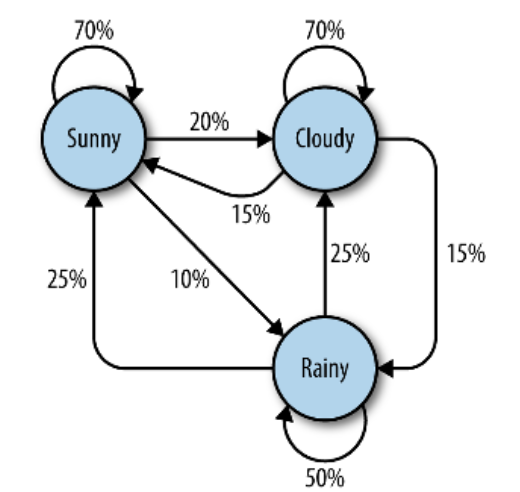  
 - Google’s page-rank algorithm is based partly on a Markov mode

 output of this code changes every time it is run,  
  -  <font color=pink>buildWordDict</font> takes in the string of text  
  -  does some cleaning and formatting, removing quotes and putting spaces around other punctuation so it is effectively treated as a separate word  
  - builds a two-dimensional dictionary—a dictionary of dictionaries  
  - 
{word_a : {word_b : 2, word_c : 1, word_d : 1}, word_e : {word_b : 5, word_d : 2},...}  
   - word_a would have a `50% arrow pointing toward “word_b”` (which followed it two out of four times), a `25% arrow pointing toward “word_c,”` and a `25% arrow pointing toward “word_d.”`  
   -  The exception is the last word in the text, because nothing follows the last word.

In [6]:
from urllib.request import urlopen
from random import randint

def wordListSum(wordList):
    sum = 0
    for word, value in wordList.items():
        sum += value
    return sum

def retrieveRandomWord(wordList):
    randIndex = randint(1, wordListSum(wordList))
    for word, value in wordList.items():
        randIndex -= value
        if randIndex <= 0:
            return word

def buildWordDict(text):
    # Remove newlines and quotes
    text = text.replace('\n', ' ');
    text = text.replace('"', '');

    # Make sure punctuation marks are treated as their own "words,"
    # so that they will be included in the Markov chain
    punctuation = [',','.',';',':']
    for symbol in punctuation:
        text = text.replace(symbol, ' {} '.format(symbol));

    words = text.split(' ')
    # Filter out empty words
    words = [word for word in words if word != '']
    
    wordDict = {}
    for i in range(1, len(words)):
        if words[i-1] not in wordDict:
                # Create a new dictionary for this word
            wordDict[words[i-1]] = {}
        if words[i] not in wordDict[words[i-1]]:
            wordDict[words[i-1]][words[i]] = 0
        wordDict[words[i-1]][words[i]] += 1
    return wordDict

text = str(urlopen('http://pythonscraping.com/files/inaugurationSpeech.txt')
          .read(), 'utf-8')
wordDict = buildWordDict(text)

#Generate a Markov chain of length 100
length = 100
chain = ['I']
for i in range(0, length):
    newWord = retrieveRandomWord(wordDict[chain[-1]])
    chain.append(newWord)

print(' '.join(chain))

I have enjoyed much resemble the same Almighty Power which they had sought protection in the one understood and the sovereigns , and activity of democracy . In the same effects of hasty legislation and prejudices . To a solecism in his bosom , fashioned by the ruling passion of party for schemes of the mind of the others of the same Almighty hand as they would be strictly proper that any legitimate exercise of constitutional authority for the States , to do not to the people--a breath of Congress--that the laws , I conceive , of all the hands of


# Six Degrees of Wikipedia: Conclusion  
***  
 - Chapter 3, you created a scraper that collects links from one Wikipedia article to the next, starting with the article on Kevin Bacon  
 - Chapter 6, stored those links in a database.  
 - turns out the problem of choosing a path of links that starts on one page and ends up on the target page (i.e., finding a string of pages between https://en.wikipedia.org/wiki/Kevin_Bacon and https://en.wikipedia.org/wiki/Eric_Idle)   
 -> is the same as finding a Markov chain where both the first word and last word are defined.  

<br>   
 - is through a `breadth-first search`.  
  - performed by first searching all links that link directly to the starting page.  
  - If those links do not contain the target page (the page you are searching for), then a second level of links  
  -  process continues until either the depth limit (6 in this case) is reached or the target page is found.  
  

In [1]:
import pymysql

conn = pymysql.connect(host='127.0.0.1', unix_socket='/tmp/mysql.sock', 
                       user='root', passwd='0314', db='mysql', charset='utf8')
cur = conn.cursor()
cur.execute('USE wikipedia')

# getUrl is a helper function that retrieves URLs from the database given a page ID
def getUrl(pageId):
    cur.execute('SELECT url FROM pages WHERE id = %s', (int(pageId)))
    return cur.fetchone()[0]

# getLinks takes a fromPageId representing the integer ID for the current page, 
# and fetches a list of all integer IDs for pages it links to.
def getLinks(fromPageId):
    cur.execute('SELECT toPageId FROM links WHERE fromPageId = %s', (int(fromPageId)))
    if cur.rowcount == 0:
        return []
    return [x[0] for x in cur.fetchall()]

# searchBreadth, works recursively to construct a list of all possible paths 
# from the search page and stops when it finds a path that has reached the target page:
def searchBreadth(targetPageId, paths=[[1]]):  # It starts with a single path, [1]
    newPaths = []
    for path in paths:    
    # For each path in the list of paths, it gets all of the links that link out from the page 
    #represented by the last page in the path.
        links = getLinks(path[-1])
        for link in links:
            if link == targetPageId:
                return path + [link]
            # For each of these outbound links, it checks whether they match the targetPageId. 
            # If there’s a match, that path is returned.
            else:
                newPaths.append(path+[link])
                # If there’s no match, a new path is added to a new list of (now longer) paths, 
                # consisting of the old path + the new outbound page link
    return searchBreadth(targetPageId, newPaths)
    # If the targetPageId is not found at this level at all, a recursion occurs and 
    # searchBreadth is called with the same targetPageId and a new, longer, list of paths.           
nodes = getLinks(1)
targetPageId = 10
pageIds = searchBreadth(targetPageId)
for pageId in pageIds:
    print(getUrl(pageId))
    # After the list of page IDs containing a path between the two pages is found, 
    # each ID is resolved to its actual URL and printed.

OperationalError: (2003, "Can't connect to MySQL server on '127.0.0.1' ([Errno 2] No such file or directory)")

# Natural Language Toolkit  
***  
pip install -U nltk  
 - Python libraries designed to identify and tag parts of speech found in natural English text

In [11]:
cur.close()
conn.close()

Error: Already closed

import nltk  
nltk.download() 
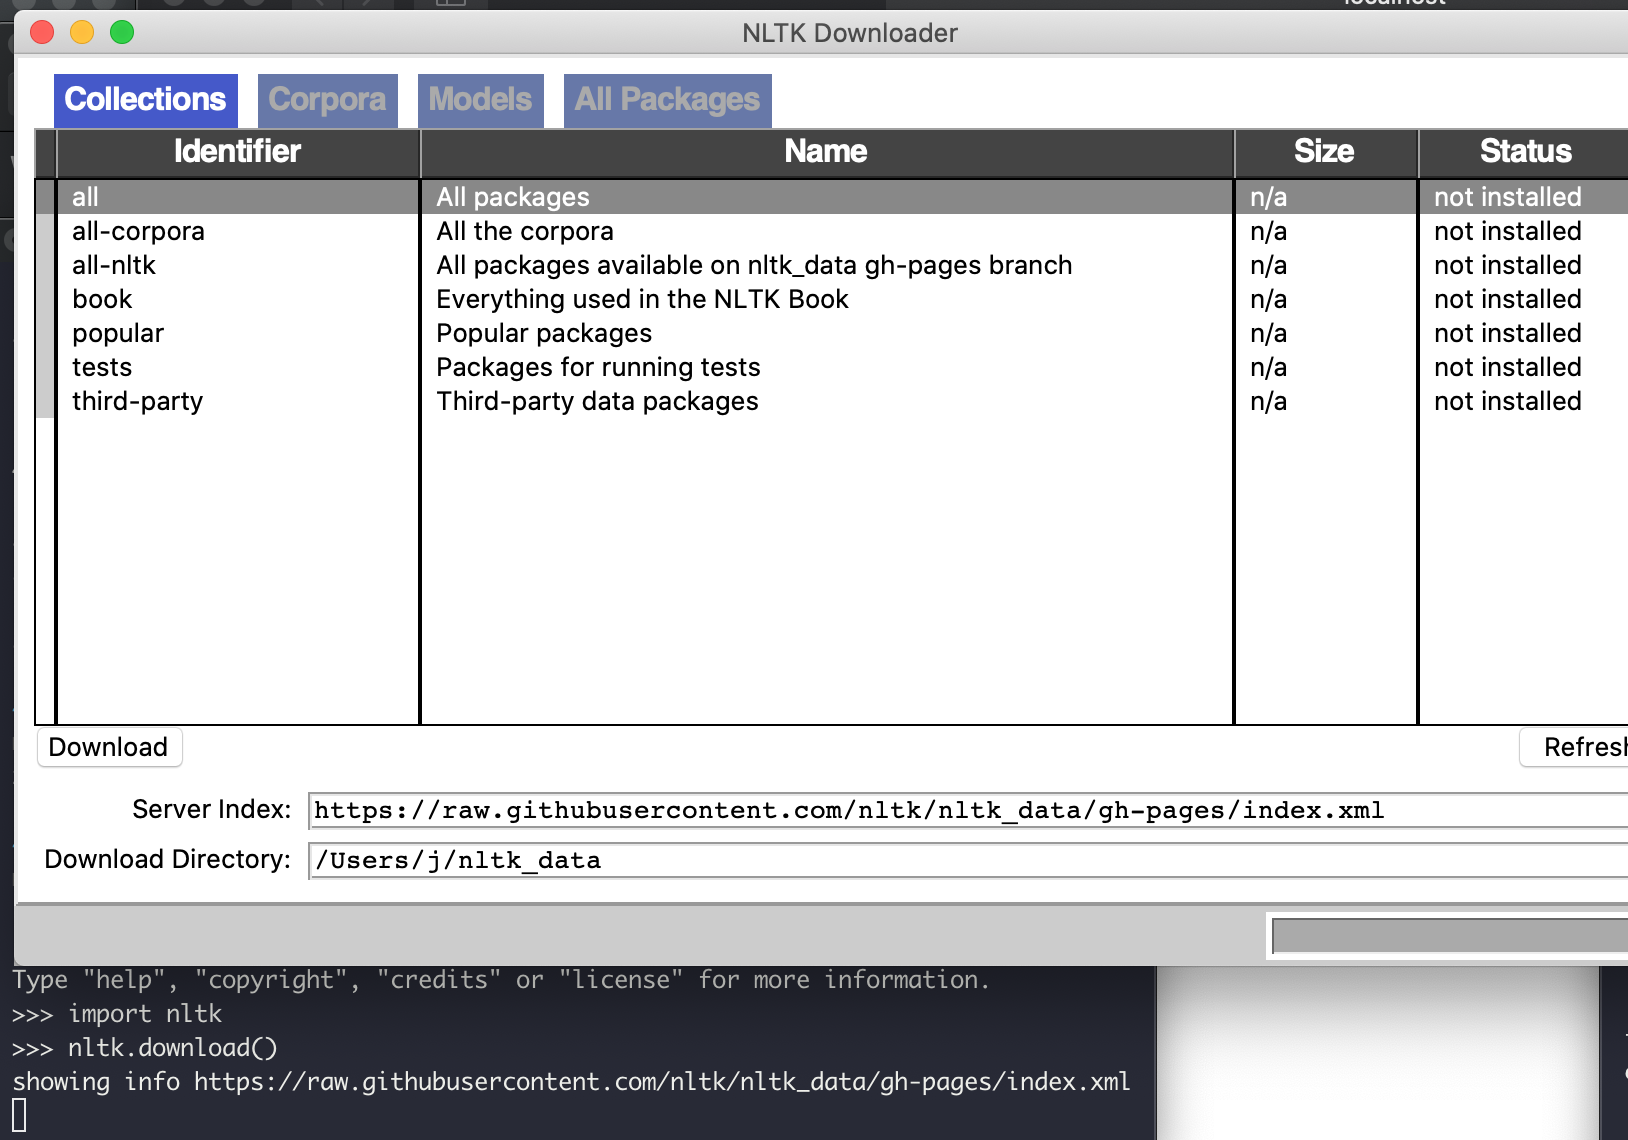

## Statistical Analysis with NLTK  
***  
NLTK is great for generating statistical information about word counts, word frequency, and word diversity in sections of text.  
  
 - Analysis with NLTK always starts with the `Text` object  
 - The input for the `word_tokenize` function can be any Python text string

In [23]:
from nltk import word_tokenize 
from nltk import Text

tokens = word_tokenize('Here is some not very interesting text') 
text = Text(tokens)
print(text)


<Text: Here is some not very interesting text...>


This loads the nine books:

In [14]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [16]:
 len(text6)/len(set(text6))

7.833333333333333

In [17]:
from nltk import FreqDist
fdist = FreqDist(text6)
fdist.most_common(10)

[(':', 1197),
 ('.', 816),
 ('!', 801),
 (',', 731),
 ("'", 421),
 ('[', 319),
 (']', 312),
 ('the', 299),
 ('I', 255),
 ('ARTHUR', 225)]

In [19]:
from nltk import bigrams
bigrams = bigrams(text6)
bigramsDist = FreqDist(bigrams)
bigramsDist[('Sir', 'Robin')]

18

In [20]:
from nltk import ngrams
fourgrams = ngrams(text6, 4)
fourgramsDist = FreqDist(fourgrams)
fourgramsDist[('father', 'smelt', 'of', 'elderberries')]

1

In [22]:
from nltk.book import * 
from nltk import ngrams 
fourgrams = ngrams(text6, 4) 
for fourgram in fourgrams:
    if fourgram[0] == 'coconut': 
        print(fourgram)

('coconut', 'and', 'you', "'")
('coconut', "'", 's', 'tropical')
('coconut', '?', 'ARTHUR', ':')
('coconut', '.', 'ARTHUR', ':')
('coconut', 'back', 'anyway', '...')
('coconut', 'on', 'a', 'line')


# Lexicographical Analysis with NLTK

In [31]:
from nltk.book import *
from nltk import word_tokenize

text = word_tokenize('Strange women lying in ponds distributing swords is no basis for a system of government.')

In [32]:
from nltk import pos_tag
pos_tag(text)

[('Strange', 'JJ'),
 ('women', 'NNS'),
 ('lying', 'VBG'),
 ('in', 'IN'),
 ('ponds', 'NNS'),
 ('distributing', 'VBG'),
 ('swords', 'NNS'),
 ('is', 'VBZ'),
 ('no', 'DT'),
 ('basis', 'NN'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('system', 'NN'),
 ('of', 'IN'),
 ('government', 'NN'),
 ('.', '.')]